In [16]:
# import dependencies
import pandas as pd
import numpy as np
import timeit
import matplotlib.pyplot as plt
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the time module.
import time



In [2]:
# create a list of latitudes and Longitudes and zip them
lat=np.random.uniform(low=-90.000,high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs=zip(lat,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates

[(30.806283300428632, -38.409263782397346),
 (50.36122431277707, -119.39655434761251),
 (45.07194960451679, 72.85539224533943),
 (-1.3674469602770074, 31.18617959848342),
 (-38.308666408292275, -10.681268154734681),
 (28.54569714817434, 35.735809329127335),
 (-28.294289187246875, 16.6449607820893),
 (-69.33311042897722, -48.05763563921147),
 (-62.16508918081879, 75.88014523266096),
 (74.21086989224065, -133.57228957009352),
 (46.0793481505894, -72.81689019652335),
 (44.24330160001105, -83.06631326230084),
 (30.99146039428213, 27.904000221818194),
 (74.08549232311401, -156.25332407585844),
 (0.9162674858784783, -171.6379204148063),
 (-27.615318302825614, -84.45240641358274),
 (34.955699125019876, 48.10296290021279),
 (-10.713581611738093, 74.76756009524894),
 (82.56239234205822, -65.62771421568179),
 (8.576832255873427, -26.446386810475275),
 (79.3015008086308, 161.9485546911912),
 (-49.912749706221945, 59.81065418282981),
 (-55.20168261635288, -59.647042247154445),
 (8.555514998141788,

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [6]:
cities

['ribeira grande',
 'vernon',
 'saryshagan',
 'bugene',
 'jamestown',
 'tabuk',
 'oranjemund',
 'ushuaia',
 'saint-philippe',
 'tuktoyaktuk',
 'pierreville',
 'alpena',
 'marsa matruh',
 'barrow',
 'saleaula',
 'coquimbo',
 'bahar',
 'hithadhoo',
 'narsaq',
 'sao filipe',
 'cherskiy',
 'taolanaro',
 'santa cruz',
 'majene',
 'horki',
 'mataura',
 'kavieng',
 'cape town',
 'mamallapuram',
 'haines junction',
 'salvador',
 'kapaa',
 'grand centre',
 'vilyuysk',
 'atar',
 'thompson',
 'sentyabrskiy',
 'puerto ayora',
 'port alfred',
 'dong xoai',
 'dingle',
 'leninskoye',
 'cachoeira do sul',
 'esperance',
 'oussouye',
 'punta arenas',
 'kostroma',
 'saskylakh',
 'waipawa',
 'katsuura',
 'tasiilaq',
 'hermanus',
 'hilo',
 'hasaki',
 'marzuq',
 'la ronge',
 'ugoofaaru',
 'ardesen',
 'vaini',
 'hamilton',
 'nikolskoye',
 'busselton',
 'hobart',
 'cilegon',
 'det udom',
 'lebu',
 'verkhoyansk',
 'krasnoselkup',
 'butaritari',
 'antofagasta',
 'sakakah',
 'xinzhi',
 'cortez',
 'tabiauea',
 't

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)# Starting URL for Weather Map API Call.

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0321ca41a7cfb548ec58b2953f7ca66


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# #If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | vernon
Processing Record 3 of Set 1 | saryshagan
City not found. Skipping...
Processing Record 4 of Set 1 | bugene
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | tabuk
Processing Record 7 of Set 1 | oranjemund
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | pierreville
Processing Record 12 of Set 1 | alpena
Processing Record 13 of Set 1 | marsa matruh
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | saleaula
City not found. Skipping...
Processing Record 16 of Set 1 | coquimbo
Processing Record 17 of Set 1 | bahar
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | narsaq
Processing Record 20 of Set 1 | sao filipe
Processing Record 21 of Set 1 | cherskiy
Processing Record 22 of Set 1 | taolanaro
City not found. Skipping...
Processin

Processing Record 40 of Set 4 | awbari
Processing Record 41 of Set 4 | jiwani
Processing Record 42 of Set 4 | bengkulu
Processing Record 43 of Set 4 | bethel
Processing Record 44 of Set 4 | saint-pierre
Processing Record 45 of Set 4 | abha
Processing Record 46 of Set 4 | pointe michel
Processing Record 47 of Set 4 | marcona
City not found. Skipping...
Processing Record 48 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 49 of Set 4 | rock sound
Processing Record 50 of Set 4 | hai phong
City not found. Skipping...
Processing Record 1 of Set 5 | zaqatala
Processing Record 2 of Set 5 | bayangol
Processing Record 3 of Set 5 | nalut
Processing Record 4 of Set 5 | georgetown
Processing Record 5 of Set 5 | sur
Processing Record 6 of Set 5 | tamandare
Processing Record 7 of Set 5 | rajanpur
Processing Record 8 of Set 5 | tayu
Processing Record 9 of Set 5 | alyangula
Processing Record 10 of Set 5 | namatanai
Processing Record 11 of Set 5 | saint george
Processing Record 12 of S

City not found. Skipping...
Processing Record 28 of Set 8 | cam pha
City not found. Skipping...
Processing Record 29 of Set 8 | la palma
Processing Record 30 of Set 8 | cortes
Processing Record 31 of Set 8 | indramayu
Processing Record 32 of Set 8 | touros
Processing Record 33 of Set 8 | stropkov
Processing Record 34 of Set 8 | peterhead
Processing Record 35 of Set 8 | am timan
Processing Record 36 of Set 8 | phetchabun
Processing Record 37 of Set 8 | samusu
City not found. Skipping...
Processing Record 38 of Set 8 | mount isa
Processing Record 39 of Set 8 | whitehorse
Processing Record 40 of Set 8 | mogadishu
Processing Record 41 of Set 8 | bose
Processing Record 42 of Set 8 | fairlie
Processing Record 43 of Set 8 | dinsor
City not found. Skipping...
Processing Record 44 of Set 8 | urumqi
Processing Record 45 of Set 8 | shahr-e kord
Processing Record 46 of Set 8 | ibotirama
Processing Record 47 of Set 8 | fairbanks
Processing Record 48 of Set 8 | acapulco
Processing Record 49 of Set 8

Processing Record 14 of Set 12 | tilichiki
Processing Record 15 of Set 12 | baykit
Processing Record 16 of Set 12 | talnakh
Processing Record 17 of Set 12 | ca mau
Processing Record 18 of Set 12 | gedangan
Processing Record 19 of Set 12 | hollola
Processing Record 20 of Set 12 | vicuna
Processing Record 21 of Set 12 | yantikovo
Processing Record 22 of Set 12 | phalaborwa
Processing Record 23 of Set 12 | alice town
Processing Record 24 of Set 12 | kem
Processing Record 25 of Set 12 | naron
Processing Record 26 of Set 12 | waddan
Processing Record 27 of Set 12 | plouzane
Processing Record 28 of Set 12 | vardo
Processing Record 29 of Set 12 | mareeba
Processing Record 30 of Set 12 | zlitan
Processing Record 31 of Set 12 | lavrentiya
Processing Record 32 of Set 12 | marang
Processing Record 33 of Set 12 | barbar
City not found. Skipping...
Processing Record 34 of Set 12 | isangel
Processing Record 35 of Set 12 | marawi
Processing Record 36 of Set 12 | kamskiye polyany
Processing Record 37 

In [10]:
# Lenght of City Data dictionary
len(city_data)

584

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.52,-28.70,56.73,83,88,5.59,PT,2020-02-22 05:47:05
1,Vernon,50.26,-119.27,39.20,60,90,4.70,CA,2020-02-22 05:47:05
2,Bugene,-1.59,31.14,68.13,80,84,1.68,TZ,2020-02-22 05:47:06
3,Jamestown,42.10,-79.24,28.99,53,1,13.87,US,2020-02-22 05:45:39
4,Tabuk,17.42,121.44,79.68,57,29,5.61,PH,2020-02-22 05:47:06


In [12]:
city_data_df=city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ribeira Grande,PT,2020-02-22 05:47:05,38.52,-28.70,56.73,83,88,5.59
1,Vernon,CA,2020-02-22 05:47:05,50.26,-119.27,39.20,60,90,4.70
2,Bugene,TZ,2020-02-22 05:47:06,-1.59,31.14,68.13,80,84,1.68
3,Jamestown,US,2020-02-22 05:45:39,42.10,-79.24,28.99,53,1,13.87
4,Tabuk,PH,2020-02-22 05:47:06,17.42,121.44,79.68,57,29,5.61


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [20]:
# Get today's date in seconds.
#today = time.time()
today=time.strftime("%x")
today

'02/21/20'

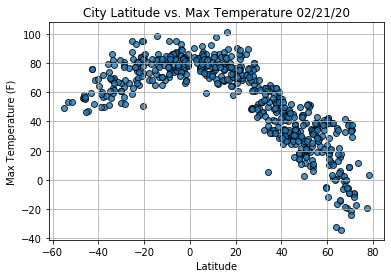

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

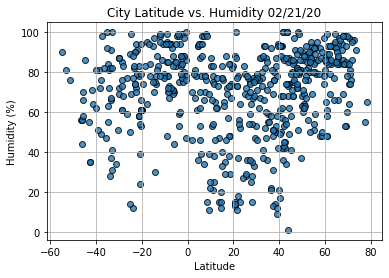

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

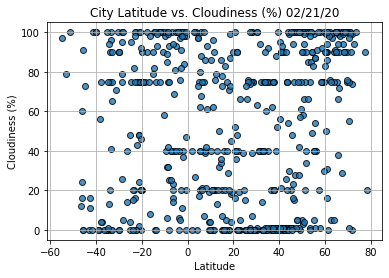

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

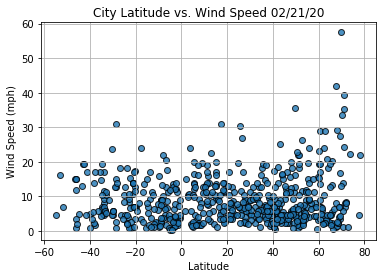

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()